# Yelp Business Dataset
This dataset, consisting of information on businesses from Yelp, includes infromation of ~200000 business around the globe. Since the goal of this project is to explore Mapping visualizations in Python, analysis will be very specfic to the maps produced. 

Column descriptions - 
- business_id: String, 22 character unique string business id
- name: String, the business's name
- neighborhood: String, the neighborhood's name
- address: String, the full address of the business
- city: String, the city
- state: String, 2 character state code, if applicable
- latitude: Float, latitude
- longitude: Float, longitude
- stars: Float, star rating, rounded to half-stars
- review_count: Interger, number of reviews
- is_open: Integer, 0 or 1 for closed or open, respectively
- categories: An array of strings of business categories
- attributes: object, business attributes to values. note: some attribute values might be objects
- hours: An object of key day to value hours, hours are using a 24hr clock

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

# Reading Data

In [1]:
#To read a csv file in chunks (because of the size)
def read_csv(data):
    dataframe = pd.read_csv(data, encoding='utf8', low_memory = False, 
                            error_bad_lines = False, chunksize=200000) 
    return dataframe

#To join the chunks into a dataframe
def to_dataframe(different_data):
    mylist = []
    for chunk in different_data:
        mylist.append(chunk)
    review = pd.concat(mylist, axis= 0)
    return review

In [5]:
business = to_dataframe(read_csv("yelp_academic_dataset_business.csv"))
#reviews = to_dataframe(read_csv("yelp_academic_dataset_review.csv"))

In [27]:
list(business)

['business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'categories',
 'attributes',
 'hours']

In [8]:
#Eliminating rows with NaN in latitude or longitude columns
business = business[business['latitude'].isna() == False]
business = business[business['longitude'].isna() == False]

# Businesses throughout the globe

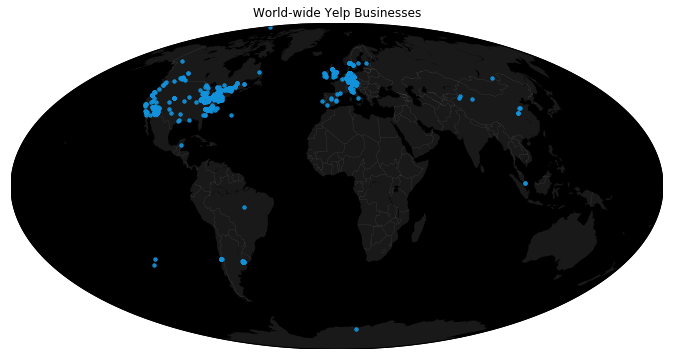

In [29]:
plt.figure(1, figsize=(12,6))

# use ortho projection for the globe type version
full_plot = Basemap(projection='moll', lat_0= 0, lon_0 = 0)

#Customize colors 
full_plot.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
full_plot.drawmapboundary(fill_color='#000000')                # black background
full_plot.drawcountries(linewidth=0.05, color="w") 

#Fill the plot with data
plotxy = full_plot(business["longitude"].tolist(), business["latitude"].tolist())
full_plot.scatter(plotxy[0], plotxy[1], s=2, c="#1292db", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Businesses")
plt.show()
 

Looks like the businesses are concentrated in North America and Europe. Directing the analysis towards these two continents might be fruitful.

Note: Points lying in the middle of the ocean or in antarctica are likely to be misread latitude and longitude values. 

# Businesses in North America and Europe with open/closed marked

Text(0.5, 1.0, 'North America Region')

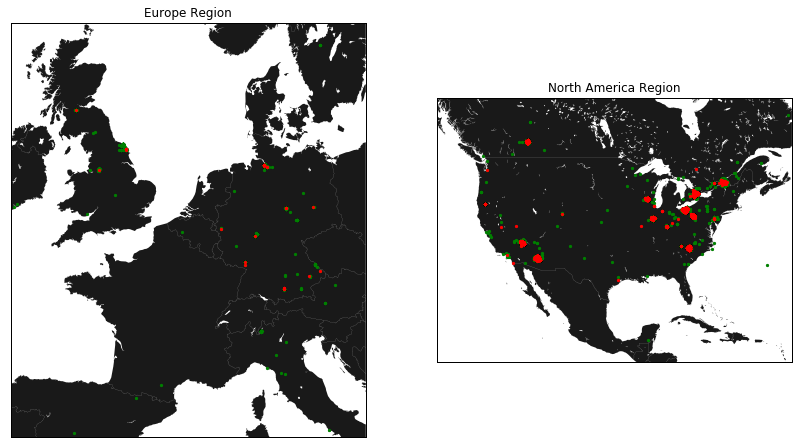

<Figure size 1008x720 with 0 Axes>

In [15]:
#Get the min and max latitudes and longitudes of Europe from google
lon_min, lon_max = -8.613281,16.699219
lat_min, lat_max = 40.488737,59.204064

#Subset the location columns accordingly
euro_location = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)

euro_business=business[euro_location]

euro_open = euro_business[euro_business['is_open'] == 1]
euro_close = euro_business[euro_business['is_open'] == 0]


#initiate the figure
f,(plot1,plot2) = plt.subplots(1,2, figsize=(14,10))

euro_map = Basemap(projection='merc',
                     llcrnrlat=lat_min,
                     urcrnrlat=lat_max,
                     llcrnrlon=lon_min,
                     urcrnrlon=lon_max,
                     lat_ts=35,
                     resolution='i',
                     ax = plot1)

# dark grey land, white lakes
euro_map.fillcontinents(color='#191919',lake_color='w') 
# white background
euro_map.drawmapboundary(fill_color='w')               
# thin white line for country borders
euro_map.drawcountries(linewidth=0.1, color="w")       


# Plot the data
mxy = euro_map(euro_open["longitude"].tolist(), euro_open["latitude"].tolist())
mxy1 = euro_map(euro_close["longitude"].tolist(), euro_close["latitude"].tolist())
euro_map.scatter(mxy[0], mxy[1], s=5, c="g", lw=1, alpha=1, zorder=10)
euro_map.scatter(mxy1[0], mxy1[1], s=5, c="r", lw=1, alpha=1, zorder=10)

plot1.set_title("Europe Region")

#Get the min and max latitudes and longitudes of North America from google
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#Subset the location columns accordingly
NA_location = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)

NA_business=business[NA_location]

NA_open = NA_business[NA_business['is_open'] == 1]
NA_close = NA_business[NA_business['is_open'] == 0]


#initiate the figure
plt.figure(figsize=(14,10))
NA_map = Basemap(projection='merc',
                 llcrnrlat=lat_min,
                 urcrnrlat=lat_max,
                 llcrnrlon=lon_min,
                 urcrnrlon=lon_max,
                 lat_ts=35,
                 resolution='i',
                 ax = plot2)

# dark grey land, white lakes
NA_map.fillcontinents(color='#191919',lake_color='w')
# white background
NA_map.drawmapboundary(fill_color='w')  
# thin white line for country borders
NA_map.drawcountries(linewidth=0.1, color="w")       

# Plot the data
mxy = NA_map(NA_open["longitude"].tolist(), NA_open["latitude"].tolist())
mxy1 = NA_map(NA_close["longitude"].tolist(), NA_close["latitude"].tolist())
NA_map.scatter(mxy[0], mxy[1], s=5, c="g", lw=1, alpha=1, zorder=5)
NA_map.scatter(mxy1[0], mxy1[1], s=5, c="r", lw=1, alpha=1, zorder=5)

plot2.set_title("North America Region")


- Europe: Businesses are mostly concentrated Germany, United Kingdom, and Italy. A lot of the businesses seem to be marked open in Europe. 


- North America: Business are mostly concentrated in the United States. It can also be noticed that most of the businesses lie in the east and west coasts. Contrary to Europe, North America seems to contain a significant number of closed business as well.


# Scatter Plot of Businesses in North America's Most Reviewed Cities

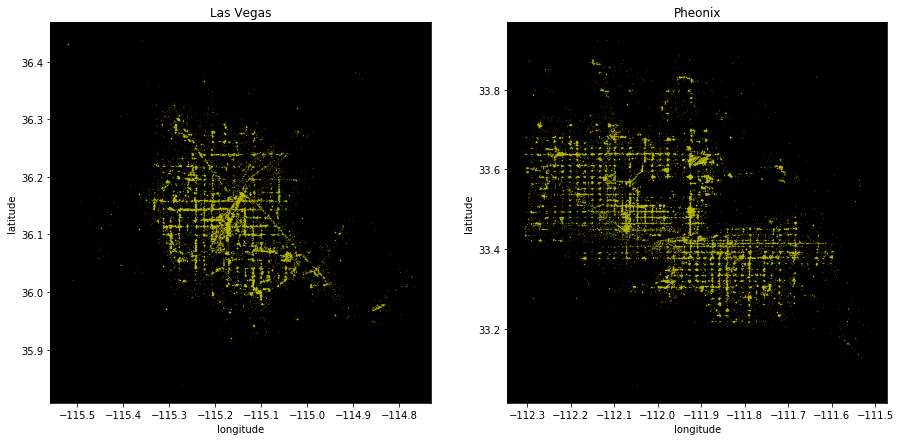

In [17]:
#Businesses in a specific city with ratings
ratings_data=business[['latitude','longitude','stars','review_count']]

f, (plot1, plot2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460

#Adjust longitudes and latitudes to create the right boundary
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5

#subset to vegas
ratings_vegas = ratings_data[(ratings_data["longitude"]>lon_min) &\
                    (ratings_data["longitude"]<lon_max) &\
                    (ratings_data["latitude"]>lat_min) &\
                    (ratings_data["latitude"]<lat_max)]

#plot Las Vegas
ratings_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='y', 
                s=.02, alpha=.6, subplots=True, ax=plot1)
plot1.set_title("Las Vegas")
plot1.set_facecolor('black')

#a random point inside pheonix
lat = 33.435463
lon = -112.006989

#Adjust longitudes and latitudes to create the right boundary
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5

#subset to phoenix
ratings_pheonix= ratings_data[(ratings_data["longitude"]>lon_min) &\
                    (ratings_data["longitude"]<lon_max) &\
                    (ratings_data["latitude"]>lat_min) &\
                    (ratings_data["latitude"]<lat_max)]
#plot Pheonix
ratings_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='y', 
                s=.02, alpha=.6, subplots=True, ax=plot2)
plot2.set_title("Pheonix")
plot2.set_facecolor('black')
f.show()


The goal of this visualization was to see if the businesses are populated in specific locations of a city. The above plots show that the businesses are spreadout throughout the city and are not concentrated in any particular location.

# Heat Map of Las Vegas

In [24]:
data=[]

#Rearranging data to suit folium
stars_list=list(rating_data['stars'].unique())
for star in stars_list:
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
    
#Initialize at vegas
lat = 36.127430
lon = -115.138460
zoom_start=11

# Heat Map Visualization
map_vegas = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=11)
map_vegas_plugins = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=False,display_index=True,radius=7)
map_vegas_plugins.add_to(map_vegas)
map_vegas

While the previous plot showed that businesses are scattered throughout the city, there was a possibility that some locations have a higher density of businesses. This heat map shows that it is not the case. Businesses are spread out pretty evenly thoughout the city. 


# Map of 5-Star Rated Businesses 

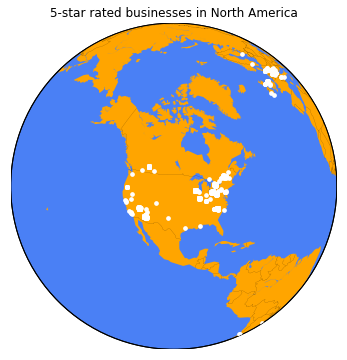

In [28]:
highest_rated = business[business['stars'] == 5]
highest_rated

plt.figure(1, figsize=(15,6))
highest_rated_map=Basemap(projection='ortho',lat_0=45,lon_0=-100)

highest_rated_map.fillcontinents(color='orange',lake_color='#4a80f5') 
highest_rated_map.drawmapboundary(fill_color='#4a80f5')                
highest_rated_map.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mapxy = highest_rated_map(highest_rated["longitude"].tolist(), highest_rated["latitude"].tolist())
highest_rated_map.scatter(mapxy[0], mapxy[1], s=3, c="white", lw=3, alpha=1, zorder=5)
plt.title("5-star rated businesses in North America")
plt.show()

While the plot points of the map is pretty obvious since every city is bound to have a few 5-star rated businesses, it is still pretty interesting that only four 5-star rated businesses fall occupy the middle region of North America (yelp). 

# More visualizations coming up!